In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('heart.csv')
df = pd.DataFrame(data)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [6]:
df.shape

(918, 12)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Feature Engineering and Data Extraction

In [9]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [10]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [14]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [15]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [16]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [17]:
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [19]:
cols = ['ST_Slope','ChestPainType','RestingECG']
df = pd.get_dummies(df,columns=cols,drop_first=True)

In [20]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,False,True,True,False,False,True,False
1,49,0,160,180,0,156,0,1.0,1,True,False,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,True,False,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,True,False


In [21]:
df = df.astype(int)

In [22]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0,0,0,1,1,0,0,1,0
1,49,0,160,180,0,156,0,1,1,1,0,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,1,0


<Axes: >

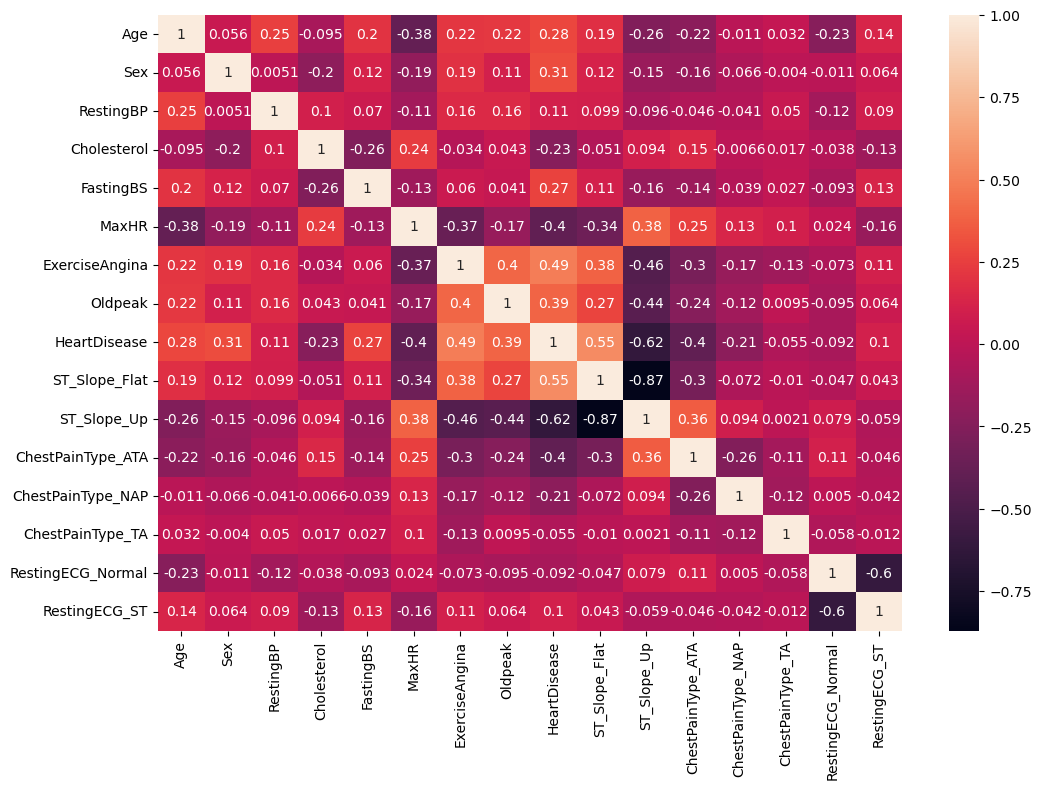

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.drop(columns=['ChestPainType_TA'],inplace=True)

In [25]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0,0,0,1,1,0,1,0
1,49,0,160,180,0,156,0,1,1,1,0,0,1,1,0
2,37,1,130,283,0,98,0,0,0,0,1,1,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,1,0


In [26]:
df.drop(columns=['RestingECG_ST','RestingECG_Normal','RestingBP'],inplace=True)

In [27]:
df.head()

,Age,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP
0,40,1,289,0,172,0,0,0,0,1,1,0
1,49,0,180,0,156,0,1,1,1,0,0,1
2,37,1,283,0,98,0,0,0,0,1,1,0
3,48,0,214,0,108,1,1,1,1,0,0,0
4,54,1,195,0,122,0,0,0,0,1,0,1


In [28]:
df.shape

(918, 12)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scalar = StandardScaler()

### Machine Model

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [48]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=2000),
    'knn' : KNeighborsClassifier(),
    'naive_bayes' : GaussianNB(),
    'decision_tree' : DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [49]:
results = []
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    cross_score = cross_val_score(model,x,y,cv=5)
    results.append({
        'Name' : model,
        'accuracy' : accu,
        'f1_score' : f1,
        'cross_val_score' : cross_score.mean()
    })

In [51]:
results

[{'Name': LogisticRegression(max_iter=2000),
  'accuracy': 0.8532608695652174,
  'f1_score': 0.8720379146919431,
  'cross_val_score': np.float64(0.82892017106201)},
 {'Name': KNeighborsClassifier(),
  'accuracy': 0.7010869565217391,
  'f1_score': 0.7342995169082126,
  'cross_val_score': np.float64(0.6688108814445236)},
 {'Name': GaussianNB(),
  'accuracy': 0.8695652173913043,
  'f1_score': 0.8867924528301887,
  'cross_val_score': np.float64(0.8408588738417677)},
 {'Name': DecisionTreeClassifier(),
  'accuracy': 0.782608695652174,
  'f1_score': 0.8076923076923077,
  'cross_val_score': np.float64(0.7156331670230458)},
 {'Name': SVC(probability=True),
  'accuracy': 0.6847826086956522,
  'f1_score': 0.7156862745098039,
  'cross_val_score': np.float64(0.6873247802328344)}]

In [52]:
import joblib
joblib.dump(models['naive_bayes'],'naive_bayes.pkl')
joblib.dump(scalar, 'scalar.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']